In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [17]:

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 3)

bmv = pd.read_csv("data-science/files/lec02/ipc0019.csv")
bmv.head()
bmv.ticker.unique()

array(['BBAJIOO MF Equity', 'ALPEKA MF Equity', 'FEMSAUBD MF Equity',
       'WALMEX* MF Equity', 'KIMBERA MF Equity', 'MEGACPO MF Equity',
       'OMAB MF Equity', 'BOLSAA MF Equity', 'GAPB MF Equity',
       'GCC* MF Equity', 'LIVEPOLC MF Equity', 'GFINBURO MF Equity',
       'CEMEXCPO MF Equity', 'GENTERA* MF Equity', 'BIMBOA MF Equity',
       'IENOVA* MF Equity', 'CUERVO* MF Equity', 'AMXL MF Equity',
       'ASURB MF Equity', 'GMEXICOB MF Equity', 'ALSEA* MF Equity',
       'ELEKTRA* MF Equity', '1746531D GZ Equity', 'GFNORTEO MF Equity',
       'GCARSOA1 MF Equity', 'PE&OLES* MF Equity', 'KOFUBL MF Equity',
       'TLEVICPO MF Equity', 'GRUMAB MF Equity', 'AC* MF Equity',
       'RA MF Equity', 'ALFAA MF Equity', 'LABB MF Equity',
       'BSMXB MF Equity', 'PINFRA* MF Equity'], dtype=object)

In [20]:

bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

ticker     1746531D GZ Equity                                          \
field                 PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN PX_VOLUME   
date                                                                    
2000-01-03                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-04                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-05                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-06                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-07                NaN     NaN    NaN    NaN     NaN       NaN   

ticker     AC* MF Equity                        ... TLEVICPO MF Equity         \
field            PX_HIGH PX_LAST PX_LOW PX_MID  ...             PX_LOW PX_MID   
date                                            ...                             
2000-01-03           NaN     NaN    NaN    NaN  ...              30.44  30.50   
2000-01-04           NaN     NaN    NaN    NaN  ...              27.30  27.45   
2000-01-05           NaN     NaN    NaN    NaN  ...              25.90  27.15   
2000-01-06           NaN     NaN    NaN    NaN  ...              27.00  27.08   
2000-01-07           NaN     NaN    NaN    NaN  ...              26.75  28.35   

ticker                        WALMEX* MF Equity                                \
field      PX_OPEN  PX_VOLUME           PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN   
date                                                                            
2000-01-03   32.20   680000.0              5.14    4.90   4.75   4.89    4.78   
2000-01-04   28.80  2980000.0              4.83    4.82   4.73   4.83    4.80   
2000-01-05   26.80  3430000.0              5.25    5.21   4.70   5.30    4.80   
2000-01-06   27.30   850000.0              5.34    5.18   5.13   5.18    5.24   
2000-01-07   26.98  2210000.0              5.63    5.51   5.19   5.69    5.19   

ticker                  
field        PX_VOLUME  
date                    
2000-01-03  17132000.0  
2000-01-04  20296000.0  
2000-01-05  20372000.0  
2000-01-06  22904000.0  
2000-01-07  23512000.0  

[5 rows x 210 columns]

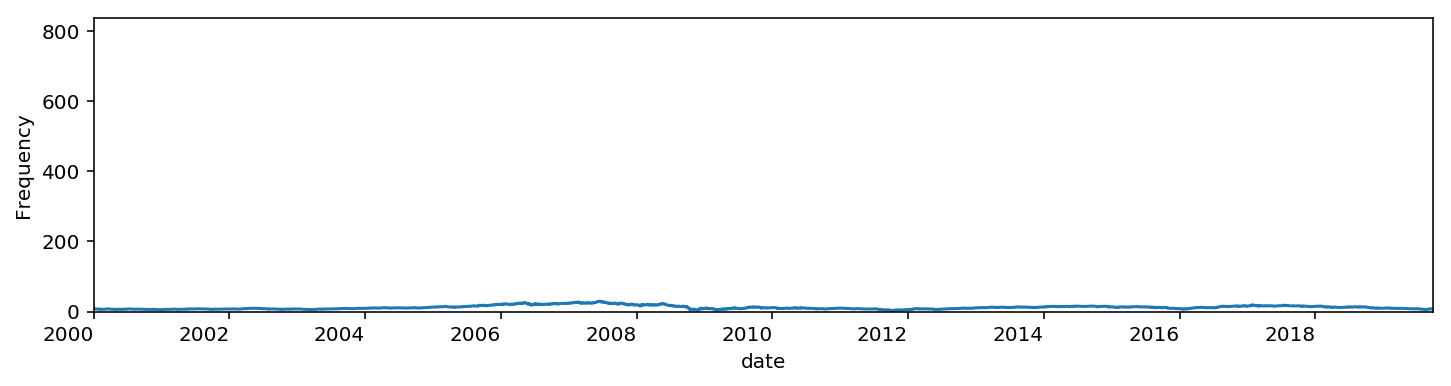

In [55]:
# Ejercicio 1. Declara la variable cemex_close siendo esta la columna PX_LAST dentro del DataFrame bmv; 
# transforma el índice de cemex_close a fin de que sea un DateTimeIndex; posteriormente, declara la variable 
# cemex_diff que contenga la diferencia de precios entre un día y el siguiente (hint: ocupa el método shift)
# Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de cemex_diff; 
# la segunda columna, un histograma de cemex_diff con bins=20.

cemex_ticker = 'CEMEXCPO MF Equity'
cemex_close = bmv[cemex_ticker, "PX_LAST"]
cemex_close.index
date_index = pd.to_datetime(cemex_close.index)
cemex_close.index = date_index

cemex_diff = cemex_close.ffill().shift(periods=1)
cemex_diff.plot(label="Cemex Diff")
cemex_diff.plot.hist(bins=20)


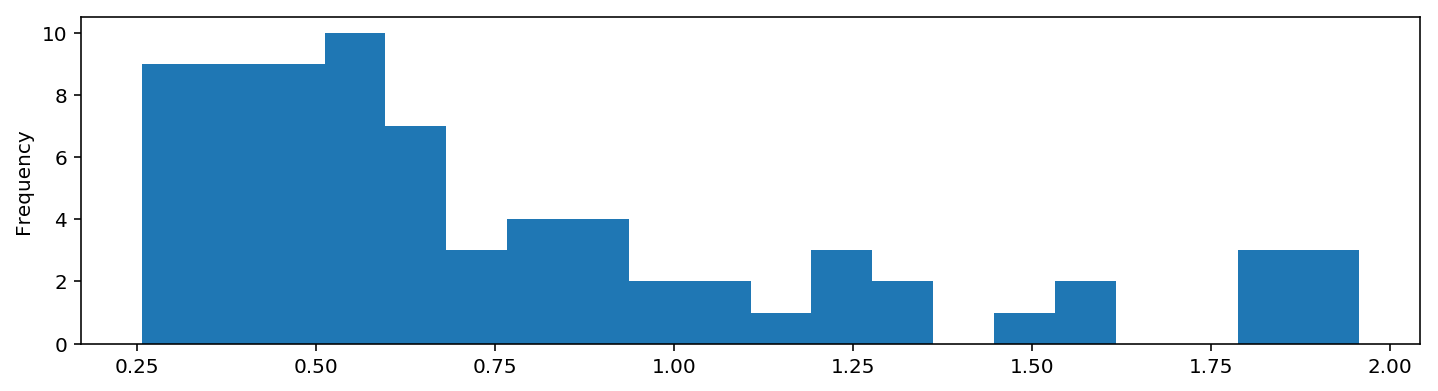

In [56]:
# Ejercicio 2. Realiza un downsampling de cemex_diff: calcula la desviación estándar por trimestre del inicio de 
# la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable cemex_std y grafica un histograma 
# con bins=20

cemex_std = cemex_diff.loc[:'2018/06/30'].resample("Q").std()
cemex_std.tail()
cemex_std.plot.hist(bins=20)


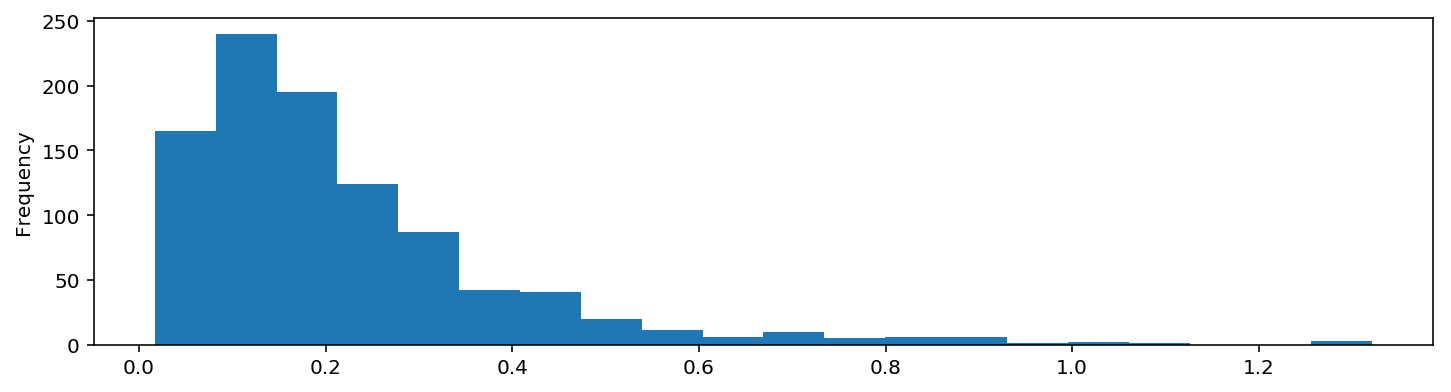

In [57]:
# Ejercicio 3. Realiza nuevamente el ejercicio 2 calculando en este caso la desviación estándar por semana. 
# ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

cemex_std = cemex_diff.loc[:'2018/06/30'].resample("W").std()
cemex_std.tail()
cemex_std.plot.hist(bins=20)


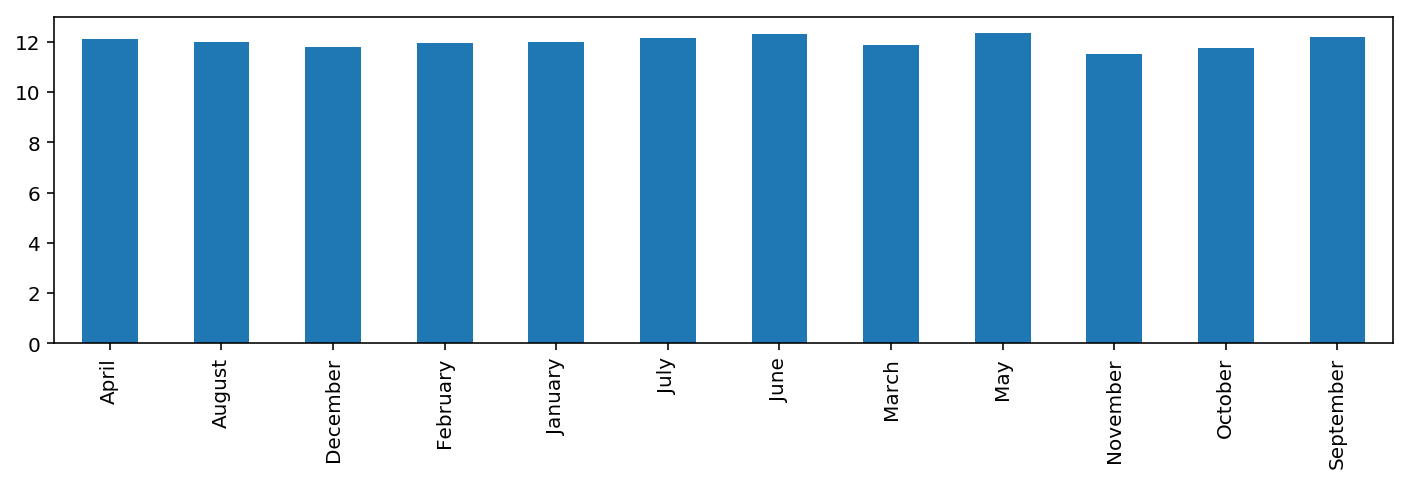

In [58]:
# Ejercicio 4. En este ejercicio analizaremos la volatilidad por mes considerando cemex_diff. 
#Corre el siguiente código y explica que hace:

meses = cemex_diff.index.strftime("%B")
cemex_diff.groupby(meses).mean().plot(kind="bar")

#¿Cómo podrías explicar la gráfica resultante?

# PORQUE ES LA MISMA DIFERENCIA EN PROMEDIO AcA

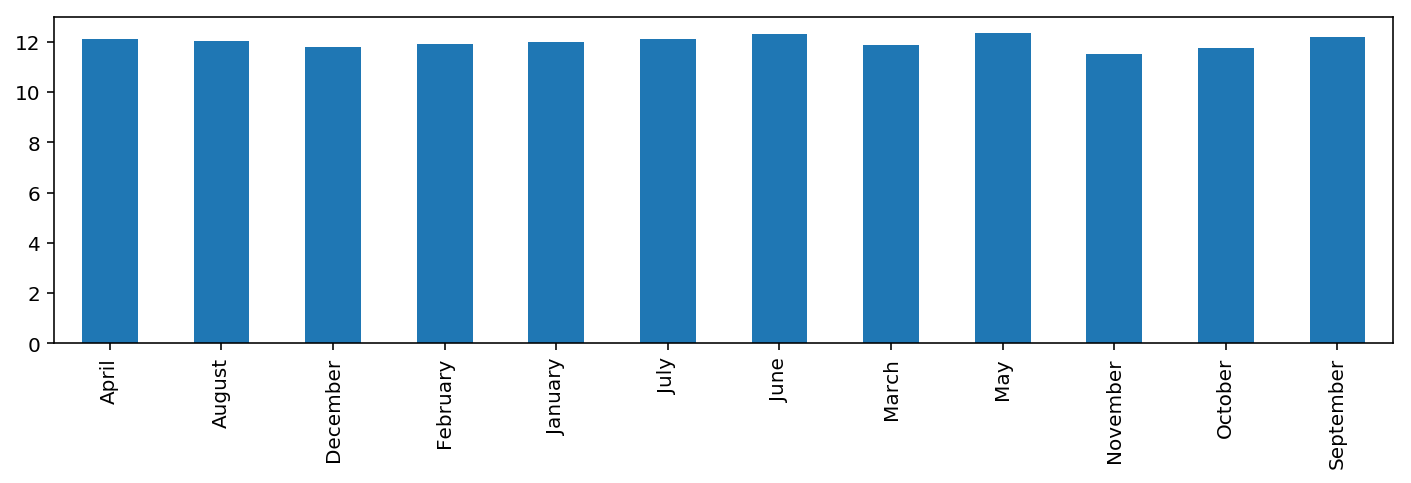

In [59]:
# Ejercicio 5. Realiza nuevamente el ejercicio 4 considerando cemex_close. ¿Por qué difieren las gráficas?


meses = cemex_close.index.strftime("%B")
cemex_close.groupby(meses).mean().plot(kind="bar")
